In [1]:
import pickle
import os
import numpy as np

# Assuming the script is located in the same directory as the 'results' folder
folder_path = os.path.join('..', 'Counterfactual-Recurrent-Network-master', 'results')
file_name = 'new_cancer_sim_2_2.p'
path = os.path.join(folder_path, file_name)

with open(path, 'rb') as f:
    results = pickle.load(f)

results['training_data'].keys()

dict_keys(['cancer_volume', 'chemo_dosage', 'radio_dosage', 'chemo_application', 'radio_application', 'chemo_probabilities', 'radio_probabilities', 'sequence_lengths', 'patient_types'])

In [90]:
results['training_data']['chemo_dosage']

array([[0.        , 0.        , 0.        , ..., 5.78341248, 2.89170624,
        0.        ],
       [0.        , 5.        , 7.5       , ..., 1.25261801, 0.626309  ,
        0.        ],
       [5.        , 7.5       , 8.75      , ..., 0.31801704, 5.15900852,
        0.        ],
       ...,
       [0.        , 5.        , 2.5       , ..., 3.75259399, 1.876297  ,
        0.        ],
       [5.        , 7.5       , 8.75      , ..., 2.08256474, 1.04128237,
        0.        ],
       [5.        , 7.5       , 3.75      , ..., 0.22341165, 5.11170582,
        0.        ]])

In [2]:
results.keys()

dict_keys(['chemo_coeff', 'radio_coeff', 'num_time_steps', 'training_data', 'validation_data', 'test_data', 'test_data_factuals', 'test_data_seq', 'scaling_data', 'window_size'])

In [3]:
results.keys()

dict_keys(['chemo_coeff', 'radio_coeff', 'num_time_steps', 'training_data', 'validation_data', 'test_data', 'test_data_factuals', 'test_data_seq', 'scaling_data', 'window_size'])

In [4]:
results['window_size']

15

In [5]:
results['training_data']

{'cancer_volume': array([[4.71217515e-01, 5.06400323e-01, 5.43179658e-01, ...,
         7.11407695e-05, 7.05711099e-05, 7.69828742e-05],
        [2.71304782e-01, 2.88086948e-01, 2.70221091e-01, ...,
         5.90135854e-05, 3.66012132e-05, 4.01814759e-05],
        [1.01239897e+01, 2.66929117e+00, 2.46726072e+00, ...,
         1.02825133e-04, 1.32674492e-04, 1.53112644e-04],
        ...,
        [1.67623368e-01, 1.74442089e-01, 1.07084173e-01, ...,
         1.58321241e-04, 1.48635422e-04, 1.09569948e-04],
        [5.92887511e+01, 3.20277834e+01, 2.55101156e+01, ...,
         1.27556054e-05, 1.24182900e-05, 1.25323189e-05],
        [1.76862557e+02, 1.52802211e+02, 1.21072051e+02, ...,
         1.03277449e-01, 1.03837994e-01, 8.86048711e-02]]),
 'chemo_dosage': array([[0.        , 0.        , 0.        , ..., 5.78341248, 2.89170624,
         0.        ],
        [0.        , 5.        , 7.5       , ..., 1.25261801, 0.626309  ,
         0.        ],
        [5.        , 7.5       , 8.75   

In [6]:
assert len(results['training_data']['cancer_volume'][0]) == len(results['training_data']['chemo_dosage'][0])
len(results['training_data']['cancer_volume'][0])

60

<BarContainer object of 60 artists>

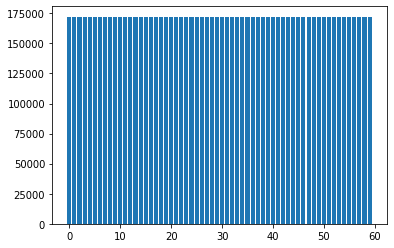

In [7]:
results['training_data']['chemo_probabilities']
# show on a bar diagram when higher probability of chemo in the 60 timesteps
import matplotlib.pyplot as plt
import numpy as np
plt.bar(np.arange(60), results['training_data']['chemo_probabilities'].sum())

Text(0.5, 1.0, 'Number of patients of the dataset  having chemo at each timestep')

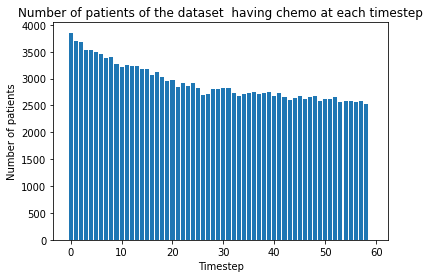

In [8]:
results['training_data']['chemo_application']
all_chemo = results['training_data']['chemo_application'].sum(axis=0)
# plot number of persons having chemo at each timestep
plt.bar(np.arange(60), all_chemo)
plt.xlabel('Timestep')
plt.ylabel('Number of patients')
plt.title('Number of patients of the dataset  having chemo at each timestep')

Text(0.5, 1.0, 'Number of patients of the dataset  having radio at each timestep')

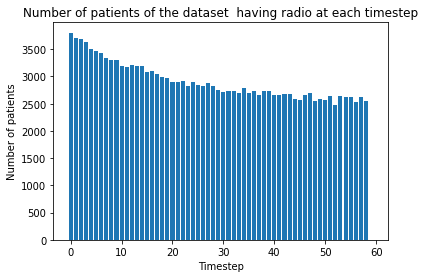

In [9]:
# do the same for radio
plt.bar(np.arange(60), results['training_data']['radio_application'].sum(axis=0))
plt.xlabel('Timestep')
plt.ylabel('Number of patients')
plt.title('Number of patients of the dataset  having radio at each timestep')


{'whiskers': [<matplotlib.lines.Line2D at 0x1be03ffeeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1be0400f4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be03ffec50>,
 'medians': [<matplotlib.lines.Line2D at 0x1be0400fa58>,
 'fliers': [<matplotlib.lines.Line2D at 0x1be0400fd30>,
 'means': []}

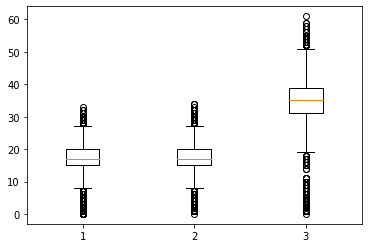

In [10]:
# boxplots of how many chemo and radio per person on the same graph, and how many procedures per person
plt.boxplot([results['training_data']['chemo_application'].sum(axis=1), results['training_data']['radio_application'].sum(axis=1), results['training_data']['chemo_application'].sum(axis=1) + results['training_data']['radio_application'].sum(axis=1)])


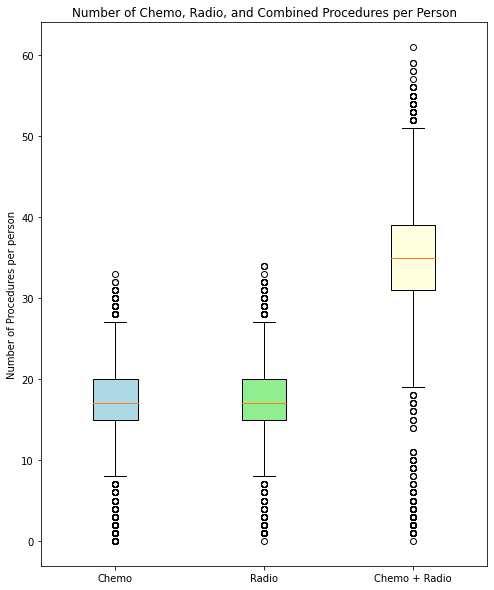

In [11]:
import matplotlib.pyplot as plt

# Data for the boxplots
data = [
    results['training_data']['chemo_application'].sum(axis=1),
    results['training_data']['radio_application'].sum(axis=1),
    results['training_data']['chemo_application'].sum(axis=1) + results['training_data']['radio_application'].sum(axis=1)
]

# Boxplot names
box_names = ['Chemo', 'Radio', 'Chemo + Radio']

# Creating a figure with a taller height
fig, ax = plt.subplots(figsize=(8, 10))  # Adjust the width and height according to your preference

# Creating a boxplot with outliers colored
boxplot = ax.boxplot(data, patch_artist=True, showfliers=True)

# Adding colors to the boxes and outliers
colors = ['lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Adding labels and title
plt.ylabel('Number of Procedures per person')
plt.xticks([1, 2, 3], box_names)
plt.title('Number of Chemo, Radio, and Combined Procedures per Person')

# Show the plot
plt.show()




In [12]:
import numpy as np

timesteps = 60
options = 4

num_policies = 10000
random_policies = np.random.randint(0, options, size=(num_policies, timesteps))
print(random_policies[:2])

# 0: no treatment, 1: chemo, 2: radio, 3: both


[[2 1 3 1 0 3 2 1 2 1 0 2 3 3 0 1 0 3 1 3 1 2 2 3 1 0 1 1 1 1 0 2 1 1 2 1
  2 1 0 3 1 1 3 1 3 3 2 1 2 3 1 1 3 2 3 0 3 0 3 3]
 [2 0 1 1 1 1 2 1 0 1 0 2 0 2 3 3 2 3 3 0 0 3 3 3 0 2 0 1 3 2 3 2 3 0 1 1
  3 3 1 1 2 3 3 1 2 1 1 3 2 0 2 3 1 0 2 1 2 1 0 3]]


In [13]:
# map the policies present in the dataset to sequences of actions
# 0: no treatment, 1: chemo, 2: radio, 3: both

def map_policies_to_actions(policies):
    actions = []
    for policy in policies:
        actions.append([0 if policy[i] == 0 else 1 if policy[i] == 1 else 2 if policy[i] == 2 else 3 for i in range(len(policy))])
    return actions

# Take a look at test data

In [14]:
dat = results['test_data_factuals']
dat.keys()

dict_keys(['cancer_volume', 'chemo_dosage', 'radio_dosage', 'chemo_application', 'radio_application', 'chemo_probabilities', 'radio_probabilities', 'sequence_lengths', 'patient_types'])

In [15]:
dat['cancer_volume'].shape

(1000, 60)

In [86]:
dat['sequence_lengths'].sort()
dat['sequence_lengths']

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,
        5.,  5.,  5.,  6.,  6.,  6.,  7.,  7., 10., 11., 13., 16., 19.,
       21., 24., 32., 32., 34., 34., 36., 37., 40., 44., 44., 45., 47.,
       47., 47., 48., 49., 49., 50., 51., 52., 52., 53., 53., 55., 56.,
       56., 56., 57., 57., 57., 58., 58., 58., 59., 59., 59., 59., 59.,
       59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59.,
       59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59.,
       59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59.,
       59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59.,
       59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59.,
       59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59.,
       59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59

# Take a look at counterfactual test data

In [16]:
dat2 = results['test_data']
dat2.keys()

dict_keys(['cancer_volume', 'chemo_application', 'radio_application', 'sequence_lengths', 'patient_types'])

In [22]:
dat2['cancer_volume']

array([[16.03198089, 14.51426998,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [16.03198089, 16.93081786,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [16.03198089,  8.83593895,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [38.18416688, 30.57928255, 25.0403437 , ...,  0.08870889,
         0.08391783,  0.08040592],
       [38.18416688, 30.57928255, 25.0403437 , ...,  0.08870889,
         0.08391783,  0.07566095],
       [38.18416688, 30.57928255, 25.0403437 , ...,  0.08870889,
         0.08391783,  0.0686236 ]])

In [17]:
print(dat2['cancer_volume'].shape)

(218776, 60)


In [18]:
dat2['chemo_application'].shape

(218776, 60)

In [19]:
unique_values, counts = np.unique(dat2['sequence_lengths'], return_counts=True)
print(unique_values, counts)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59.] [4000 3940 3904 3856 3840 3816 3804 3788 3788 3784 3776 3768 3760 3756
 3756 3748 3748 3748 3744 3744 3740 3740 3736 3736 3736 3736 3732 3732
 3724 3724 3720 3708 3704 3700 3700 3692 3680 3672 3672 3668 3668 3664
 3652 3652 3648 3644 3632 3628 3616 3608 3600 3580 3572 3564 3564 3548
 3544 3540 3532]


In [20]:
print(dat2['patient_types'].shape)

(218776,)


In [24]:
dat2['cancer_volume'][:4]

array([[16.03198089, 14.51426998,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [16.03198089, 16.93081786,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.

Text(0.5, 1.0, '4 first timepoints that will be tested for patient 1')

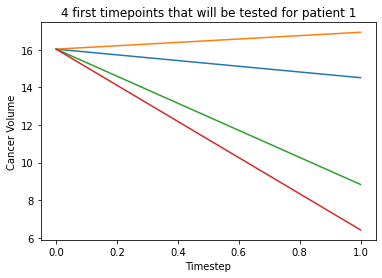

In [82]:
# plot the cancer volume of the first 4 patients
import matplotlib.pyplot as plt
d = dat2['cancer_volume'][:4, :2]
plt.plot(d.T)
plt.xlabel('Timestep')
plt.ylabel('Cancer Volume')
plt.title('4 first timepoints that will be tested for patient 1')

In [72]:
print(dat2['cancer_volume'][:60*4 - 4])


[[1.60319809e+01 1.45142700e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.60319809e+01 1.69308179e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.60319809e+01 8.83593895e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.60319809e+01 1.45142700e+01 1.43629476e+01 ... 8.88901692e-04
  1.00101888e-03 1.11913398e-03]
 [1.60319809e+01 1.45142700e+01 1.43629476e+01 ... 8.88901692e-04
  1.00101888e-03 6.13698829e-04]
 [1.60319809e+01 1.45142700e+01 1.43629476e+01 ... 8.88901692e-04
  1.00101888e-03 4.62812294e-04]]
